In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

import joblib
import pickle


In [11]:
# Read in full dataset
df = pd.read_csv('./Resources/all_songs_final.csv')
df.head()

,song,artist,year,peak-rank,weeks-on-board,track_id,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,billboard,decade
0,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,1968,76,5,4wXNtDvLZl55vlQashWQrI,0.686,0.562,5.0,-8.538,...,0.0504,0.589,0.000053,0.124,0.793,116.782,156886.0,4.0,1,1960s
1,(All Of A Sudden) My Heart Sings,Mel Carter,1965,38,7,6x5BiQwNlbtisITsEHa8Eu,0.419,0.546,7.0,-7.819,...,0.0363,0.479,0.000005,0.535,0.493,118.106,164067.0,3.0,1,1960s
2,(Baby) Hully Gully,The Olympics,1960,72,7,2CkbNJooPxUsHG4gFXKhxa,0.699,0.661,2.0,-6.090,...,0.0382,0.516,0.000000,0.198,0.869,115.772,218642.0,4.0,1,1960s
3,(Come round Here) Im The One You Need,The Miracles,1966,17,9,5YvokzRkNONpj5c0TIqTjQ,0.545,0.607,0.0,-9.525,...,0.0347,0.242,0.000000,0.779,0.767,113.880,150067.0,4.0,1,1960s
4,(Dance The) Mess Around,Chubby Checker,1961,24,7,58EirkLFB6O6wwRN9JowHB,0.511,0.694,10.0,-5.509,...,0.0479,0.381,0.000000,0.195,0.826,146.559,132933.0,4.0,1,1960s


In [12]:
# mask = df[(df['billboard']==1) & ((df['weeks-on-board']<4) & (df['peak-rank']>50))]
# df = df[(df['billboard']==0) | ((df['weeks-on-board']>4) & (df['peak-rank']<=50))]
# df.drop(mask.index, axis=1, inplace=True)
# len(df)

# df = df[(df['billboard']==0) | (df['peak-rank']<=10) & (df['weeks-on-board']>2)]

df['decade'].value_counts()
# mask

2010s    502874
2000s    427619
1990s    156740
1980s     32824
1970s     22323
1960s     15258
Name: decade, dtype: int64

In [13]:
# Create separate dataframe for each decade
df1960s = df[df['decade']=='1960s']
df1970s = df[df['decade']=='1970s']
df1980s = df[df['decade']=='1980s']
df1990s = df[df['decade']=='1990s']
df2000s = df[df['decade']=='2000s']
df2010s = df[df['decade']=='2010s']


In [14]:
df = df1980s
name = "1980s"

In [15]:
# data = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
#        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#        'duration_ms', 'time_signature']]

data = df[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12046,0.764,0.840,-9.781,0.1060,0.0866,0.000199,0.3540,0.659,111.215,289307.0
12047,0.764,0.840,-9.781,0.1060,0.0866,0.000199,0.3540,0.659,111.215,289307.0
12048,0.612,0.523,-11.425,0.0321,0.4480,0.000002,0.0727,0.495,124.315,216973.0
12049,0.615,0.845,-9.943,0.0393,0.0928,0.000028,0.0755,0.585,117.444,227960.0
12050,0.574,0.812,-3.300,0.0799,0.1490,0.000000,0.4340,0.642,111.358,237520.0


In [16]:
target = df["billboard"]
target_names = ["not_a_hit", "hit"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from collections import Counter
...
# define the undersampling method
# undersample = NearMiss(version=2, sampling_strategy={0:1000, 1:5000})
#removing the random_state dosent help
oversample = SMOTE(random_state=0, sampling_strategy=1)
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
counter

# X_res.value_counts()

Counter({0: 21124, 1: 21124})

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# # Support vector machine linear classifier
from sklearn.svm import SVC 

modelsc = SVC(kernel='rbf', probability=True)
# modelsc = LogisticRegression(class_weight='balanced')
modelsc.fit(X_train_scaled, y_train)

# Model Accuracy
print('Scaled Test Acc: %.3f' % modelsc.score(X_test_scaled, y_test))

Scaled Test Acc: 0.700


In [101]:
# create an iterator object with write permission - model.pkl
with open(f'./ML_models/scaler_{name}', 'wb') as files:
    pickle.dump(scaler, files)


# create an iterator object with write permission - model.pkl
with open(f'./ML_models/model_{name}', 'wb') as files:
    pickle.dump(modelsc, files)

In [19]:
y_pred = modelsc.predict(X_test_scaled)
precision_score(y_test, y_pred)

/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [20]:
f1_score(y_test, y_pred)

0.0

In [60]:
X_test_scaled.shape

14920      1
1137267    0
375100     0
1096021    0
803927     0
          ..
686190     0
12192      1
1134561    0
766712     0
173319     0
Name: billboard, Length: 8206, dtype: int64

In [151]:

# file name, I'm using *.joblib as a file extension
filename = "./ML_models/1980s_predictor.pickle"

# save model
joblib.dump(modelsc, filename)

# load model
loaded_model = joblib.load(filename)

test_song = [0.586,
 0.616,
#  5,
 -7.964,
#  1,
 0.0324,
 0.182,
 0,
 0.0927,
 0.719,
 148.088,
 242096]
# you can use loaded model to compute predictions
y_predicted = loaded_model.predict([test_song])

In [116]:
len(y_test)

5581

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7066
           1       0.31      0.78      0.44      1140

    accuracy                           0.72      8206
   macro avg       0.63      0.75      0.63      8206
weighted avg       0.86      0.72      0.76      8206



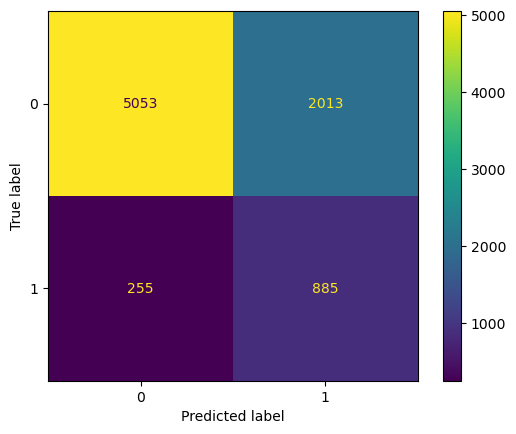

In [80]:
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

ConfusionMatrixDisplay(cm).plot()

In [30]:
test_song = [0.586,
 0.616,
#  5,
 -7.964,
#  1,
 0.0324,
 0.182,
 0,
 0.0927,
 0.719,
 148.088,
 242096]

# modelsc.predict([test_song])

modelsc.predict([test_song])

array([0])

In [152]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [153]:
# Support vector machine linear classifier
from sklearn.svm import SVC 

modelsc = SVC(kernel='linear', probability=True)
modelsc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

Scaled Test Acc: 0.675
[[1412  727]
 [  48  199]]
Precision: 0.21490280777537796


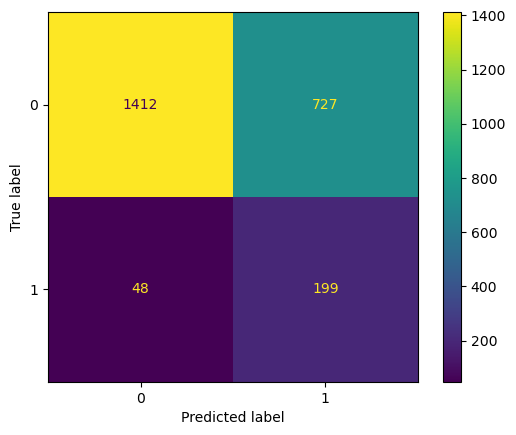

In [155]:
# Model Accuracy
print('Scaled Test Acc: %.3f' % modelsc.score(X_test_scaled, y_test))
y_true = y_test
y_predsc = modelsc.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_predsc)

print(cm)
print("Precision:", precision_score(y_true, y_predsc))


ConfusionMatrixDisplay(cm).plot()

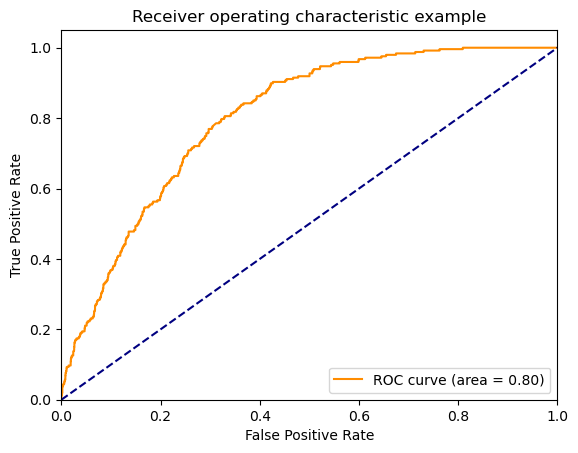

In [156]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc

y_pred_proba = modelsc.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [157]:
cm = confusion_matrix(y_test, y_predsc)

TN, FP, FN, TP = confusion_matrix(y_test, y_predsc).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  199
False Positive(FP) =  727
True Negative(TN)  =  1412
False Negative(FN) =  48
Accuracy of the binary classification = 0.675


In [91]:
from sklearn.metrics import f1_score, classification_report

report = classification_report(y_test, y_pred)
# precision_score(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.62      0.72      2151
           1       0.64      0.88      0.74      1664

    accuracy                           0.73      3815
   macro avg       0.75      0.75      0.73      3815
weighted avg       0.77      0.73      0.73      3815



In [2]:
def predict_decade(track_features, decade):
    
    file_path = "./ML_models/"
    model_names = {"1960s": "model_1960s",
                "1970s": "model_1970s",
                "1980s": "model_1980s",
                "1990s": "model_1990s",
                "2000s": "model_2000s",
                "2010s": "model_1970s"}
    
    scaler_names = {"1960s": "scaler_1960s",
                "1970s": "scaler_1970s",
                "1980s": "scaler_1980s",
                "1990s": "scaler_1990s",
                "2000s": "scaler_2000s",
                "2010s": "scaler_2010s"}

    # load model
    loaded_model = joblib.load(f"{file_path}{model_names[decade]}")
    loaded_scaler = joblib.load(f"{file_path}{scaler_names[decade]}")

    scaled_features = loaded_scaler.transform(track_features)

    # you can use loaded model to compute predictions
    y_predict = loaded_model.predict(scaled_features)
    y_pred_proba = loaded_model.predict_proba(scaled_features)

    if y_predict[0] == 1:
        billboard_prob = round(y_pred_proba[0][0], 3) * 100
        noncharting_prob = round(y_pred_proba[0][1],3) * 100
    else:
        billboard_prob = round(y_pred_proba[0][1], 3) * 100
        noncharting_prob = round(y_pred_proba[0][0],3) * 100

    
    print(f"Billboard Top 100: {billboard_prob}%\nNot Charting: {noncharting_prob}%")


In [5]:
test_song = [0.644,
 0.808,
 5,
 -7.268,
 1,
 0.0513,
 0.0467,
 0.187,
 0.0652,
 0.175,
 174.98,
 266507]


predict_decade([[0.369, 0.403, -7.996, 0.0259, 0.827, 0.0541, 0.106, 0.177, 154.899, 241917]], "1970s")

Billboard Top 100: 12.8%
Not Charting: 87.2%


/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
modelsc.predict_proba([test_song])

NameError: name 'modelsc' is not defined